# 5.3 简单线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1., 2., 3., 4., 5.])
y = np.array([1., 2., 3., 4., 5.])

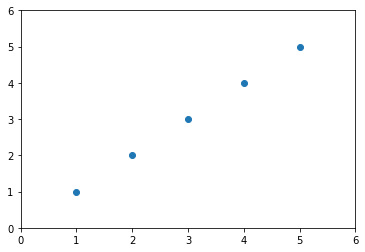

In [3]:
plt.scatter(x, y)
plt.axis([0, 6, 0, 6])
plt.show()

In [4]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [5]:
num = 0.0 # 分子
d = 0.0   # 分母

for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2

# 根据求导公式实现
a = num / d
b = y_mean - a * x_mean

In [6]:
a

1.0

In [7]:
b

0.0

In [8]:
y_hat = a * x + b

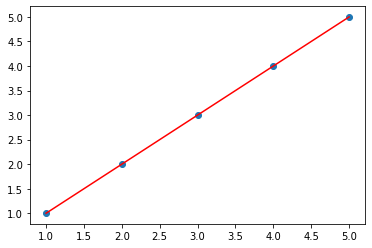

In [9]:
plt.scatter(x, y)
plt.plot(x, y_hat, color='r')
plt.show()

In [10]:
x_predict = 6
y_predict = a * x_predict + b

In [11]:
y_predict

6.0

# 使用自己的 SimpleLinearRegression

In [12]:
%run SimpleLinearRegression1.py

In [13]:
reg1 = SimpleLinearRegression1()
reg1.fit(x, y)

SimpleLinearRegression1()

In [14]:
reg1.predict(np.array([x_predict]))

array([6.])

In [15]:
reg1.a_

1.0

In [16]:
reg1.b_

0.0

In [18]:
y_hat1 = reg1.predict(x)

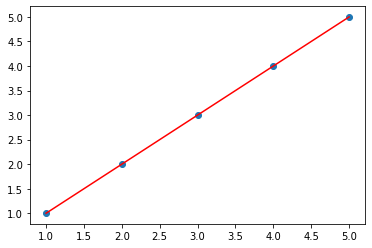

In [20]:
plt.scatter(x, y)
plt.plot(x, y_hat1, color='red')

# 向量化实现 SimpleLinearRegression

In [21]:
%run SimpleLinearRegression1.py

In [22]:
reg2 = SimpleLinearRegression2()
reg2.fit(x, y)

SimpleLinearRegression2()

In [23]:
reg2.a_

1.0

In [24]:
reg2.b_

0.0

In [25]:
y_hat2 = reg2.predict(x)

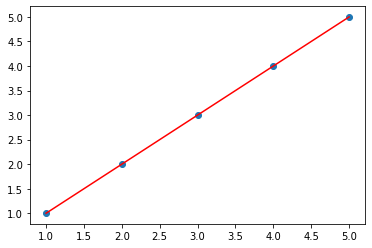

In [26]:
plt.scatter(x, y)
plt.plot(x, y_hat2, color='red')

# 向量化实现的性能测试

In [35]:
m = 1000
big_x = np.random.random(size=m)

In [36]:
big_x

array([0.27388521, 0.12092506, 0.64584176, 0.72601322, 0.83430333,
       0.89438108, 0.97847705, 0.2637445 , 0.87388446, 0.10390098,
       0.58585807, 0.79736857, 0.77889067, 0.88410161, 0.39377152,
       0.43335662, 0.17302178, 0.65005835, 0.91748847, 0.02629943,
       0.00167332, 0.53565991, 0.96201244, 0.17264269, 0.00731339,
       0.40784079, 0.95048722, 0.44651641, 0.7272342 , 0.76367835,
       0.41947686, 0.04405791, 0.91211   , 0.62422864, 0.74286528,
       0.77686731, 0.41630815, 0.07715109, 0.74866449, 0.32849271,
       0.0269273 , 0.92193403, 0.26735553, 0.86127124, 0.06721319,
       0.57965113, 0.5375433 , 0.85374988, 0.80688216, 0.16365143,
       0.76346146, 0.4082023 , 0.07529182, 0.84299346, 0.29856072,
       0.73211766, 0.9425336 , 0.69900672, 0.48646954, 0.64512967,
       0.35170929, 0.49560226, 0.88821502, 0.11851592, 0.13389416,
       0.68239684, 0.29171954, 0.98014716, 0.71959756, 0.95133623,
       0.13417535, 0.10464081, 0.40165709, 0.74525449, 0.53860

In [37]:
big_y = big_x * 2.0 + 3.0 + np.random.normal(size=m)

In [38]:
big_y

array([2.35186167, 2.67525039, 5.3349344 , 6.49821339, 4.62670178,
       4.98504687, 2.50701606, 2.77429028, 4.20789209, 2.11366188,
       4.49219629, 3.1118353 , 2.72039347, 4.07983057, 4.1279584 ,
       3.11736548, 4.11267036, 3.35729977, 4.42911227, 1.70347354,
       4.78603649, 3.85131902, 3.55488281, 2.88312278, 3.13408407,
       4.08308313, 4.70289233, 1.87004672, 4.03193002, 5.25201316,
       3.55591749, 3.4806924 , 4.74800192, 4.59047436, 4.79562642,
       6.04346427, 3.20172426, 3.80838954, 5.34688704, 4.29453738,
       3.86384981, 6.642801  , 2.54224431, 5.48213754, 2.76684109,
       4.09718682, 3.07213154, 4.1126187 , 5.79020686, 3.8275648 ,
       2.01816417, 4.45736479, 2.25367614, 6.31143291, 3.86266872,
       6.01912068, 4.82041055, 2.77530893, 4.19550595, 4.41971946,
       4.2940072 , 2.30380365, 6.3526997 , 2.50511729, 2.43751251,
       5.81479672, 5.3946584 , 5.3257315 , 4.46885695, 5.56554264,
       4.3532474 , 4.78326629, 4.5321414 , 4.52859225, 5.11055

In [39]:
%timeit reg1.fit(big_x, big_y)
%timeit reg2.fit(big_x, big_y)

985 µs ± 20.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
22.8 µs ± 283 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


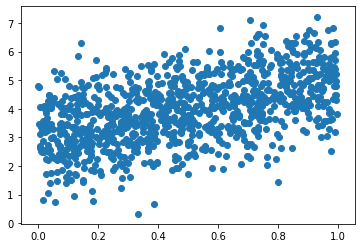

In [40]:
plt.scatter(big_x, big_y)

In [41]:
reg1.a_

2.043706825425678

In [42]:
reg1.b_

2.958740340282957

In [43]:
reg2.a_

2.043706825425675

In [44]:
reg2.b_

2.958740340282959